In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("G_API_KEY")

In [2]:
import os
from langchain_google_genai import  ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-pro-latest",api_key=os.environ["G_API_KEY"])
message = ["What is the capital of France?"]

response = llm.invoke(message)
response
type(response)

langchain_core.messages.ai.AIMessage

In [6]:
def add(a: int, b: int) -> int:
    return a + b

In [7]:
llm_with_tools = llm.bind_tools([add])

In [ ]:
from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from langgraph.graph.message import AnyMessage

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [9]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

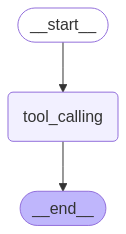

In [10]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END


def Tool_calling(state : MessagesState):
    return {"messages" :[llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling", Tool_calling)
builder.add_edge(START, "tool_calling")
builder.add_edge("tool_calling", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [ ]:
graph.invoke(